In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

### Decision Tree for classification 

In [2]:
df = pd.read_csv("iris.csv")
df

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df["class"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [4]:
df["class_value"] = df["class"].map({
    "Iris-setosa" : 0, "Iris-versicolor": 1, "Iris-virginica": 2
})
df

,sepallength,sepalwidth,petallength,petalwidth,class,class_value
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


<AxesSubplot:xlabel='sepallength', ylabel='sepalwidth'>

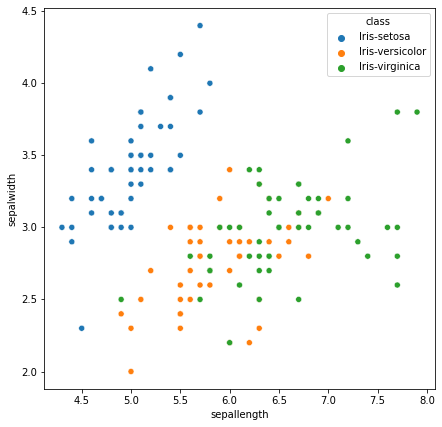

In [5]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df, x="sepallength", y="sepalwidth", hue="class")


<AxesSubplot:xlabel='sepallength', ylabel='sepalwidth'>

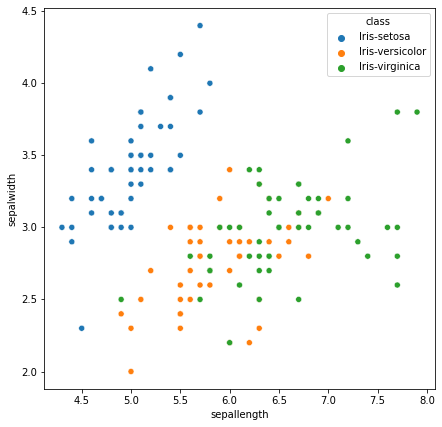

In [6]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df, x="sepallength", y="sepalwidth", hue="class")

<AxesSubplot:xlabel='petallength', ylabel='petalwidth'>

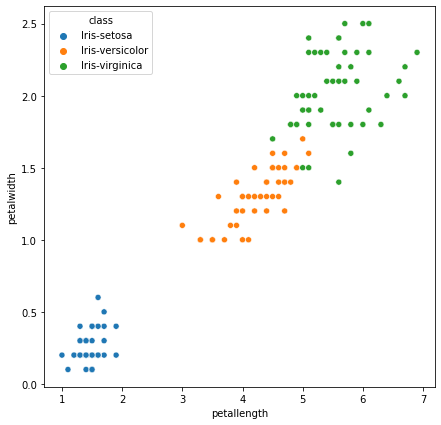

In [7]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df, x="petallength", y="petalwidth", hue="class")

<AxesSubplot:>

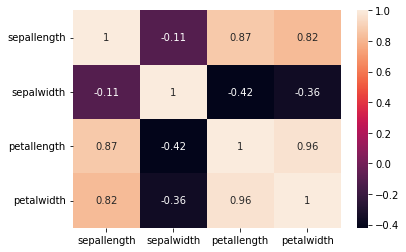

In [11]:
sns.heatmap(df.iloc[: , :4].corr(), annot=True)

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [12]:
!pip install mlxtend

     |████████████████████████████████| 1.3 MB 2.4 MB/s eta 0:00:01


In [13]:
!pip install dtreeplt

In [38]:
X = df[["petallength",'petalwidth']]
y = df.class_value

In [39]:
model = DecisionTreeClassifier(max_depth=5)
model.fit(X, y)

DecisionTreeClassifier(max_depth=5)

In [40]:
from mlxtend.plotting import plot_decision_regions

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<AxesSubplot:>

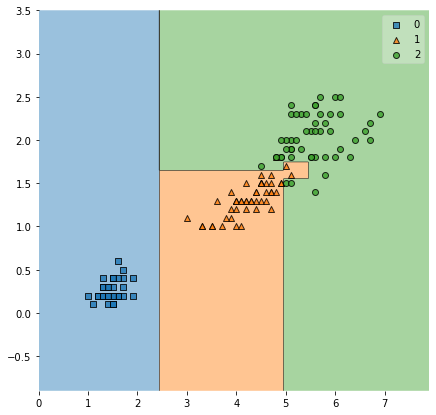

In [41]:
plt.figure(figsize=(7,7))
plot_decision_regions(X.values, y.values, model)

In [42]:
from dtreeplt import dtreeplt

In [43]:
dtreeplt(model, feature_names=X.columns, target_names=["setosa",'versicolor','virginica'])#.view()

In [44]:
x = df.iloc[ : , :4]
y = df.class_value

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [52]:
model = DecisionTreeClassifier(max_depth=5, random_state=0)
model.fit(x_train, y_train)
model.score(x_test, y_test)

1.0

In [54]:
y_pred = model.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

In [55]:
x.columns

Index(['sepallength', 'sepalwidth', 'petallength', 'petalwidth'], dtype='object')

In [56]:
model.feature_importances_

array([0.        , 0.01253395, 0.06444574, 0.92302032])

In [57]:
pd.DataFrame(model.feature_importances_, index=x.columns)

,0
sepallength,0.000000
sepalwidth,0.012534
petallength,0.064446
petalwidth,0.923020


### Decision  Tree for regression

In [61]:
np.random.seed(0)
N = 300
X = np.arange(N)
y = X ** 2 + np.random.randn(N)*10_000

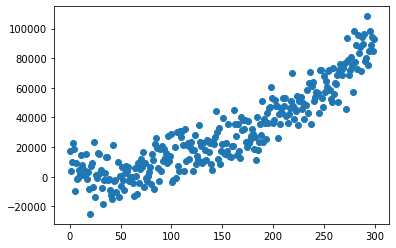

In [62]:
plt.scatter(X, y)

In [63]:
from sklearn.linear_model import LinearRegression

In [65]:
model = LinearRegression()
model.fit( X.reshape(-1,1), y)

LinearRegression()

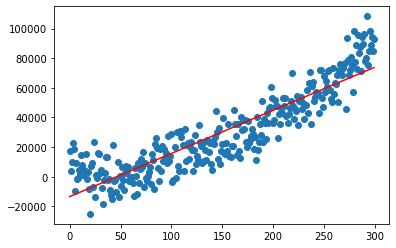

In [67]:
y_pred = model.predict(X.reshape(-1,1))
plt.scatter(X, y)
plt.plot(X, y_pred, c='r')

In [69]:
from sklearn.metrics import r2_score

In [70]:
r2_score(y, y_pred)

0.8082397250508555

In [71]:
from sklearn.tree import DecisionTreeRegressor

0.9738585597338174


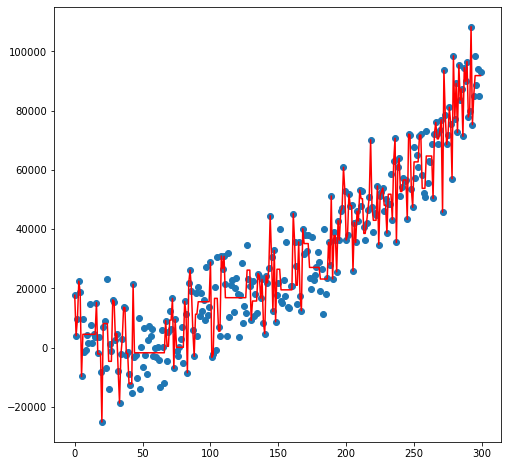

In [75]:
model = DecisionTreeRegressor(max_depth=9, random_state=0)
model.fit( X.reshape(-1,1), y)

y_pred = model.predict( X.reshape(-1,1))
print(r2_score(y, y_pred))

plt.figure(figsize= (8,8))
plt.scatter(X, y)
plt.plot(X, y_pred, c='r')
plt.show()

1.0


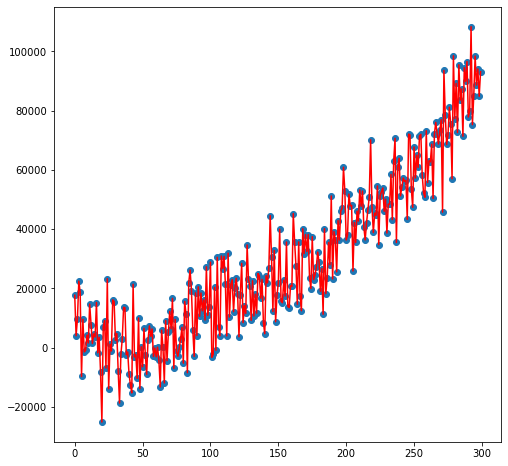

In [76]:
model = DecisionTreeRegressor(max_depth=None, random_state=0)
model.fit( X.reshape(-1,1), y)

y_pred = model.predict( X.reshape(-1,1))
print(r2_score(y, y_pred))

plt.figure(figsize= (8,8))
plt.scatter(X, y)
plt.plot(X, y_pred, c='r')
plt.show()

0.8983775759714069


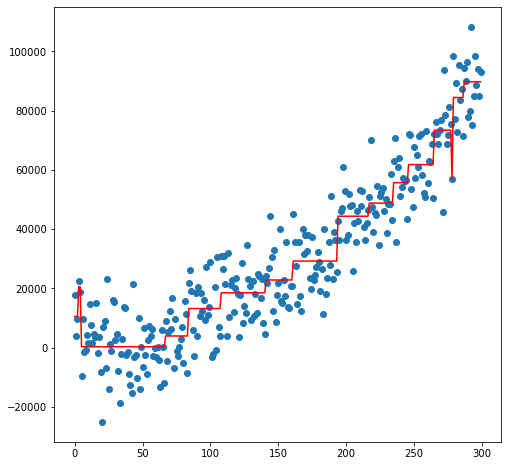

In [77]:
model = DecisionTreeRegressor(max_depth=4, random_state=0)
model.fit( X.reshape(-1,1), y)

y_pred = model.predict( X.reshape(-1,1))
print(r2_score(y, y_pred))

plt.figure(figsize= (8,8))
plt.scatter(X, y)
plt.plot(X, y_pred, c='r')
plt.show()